In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data
UPLOADED_FILE = pd.read_csv('forestfires.csv')

# Displaying the first few rows of the dataframe
UPLOADED_FILE.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


The dataset contains information about forest fires in a particular region. 

It includes variables such as:

- X and Y: the spatial coordinates
- month and day: the time of occurrence
- FFMC, DMC, DC, ISI: fire weather index related variables
- temp: temperature in Celsius degrees
- RH: relative humidity in %
- wind: wind speed in km/h
- rain: outside rain in mm/m2
- area: the burned area of the forest (in ha)

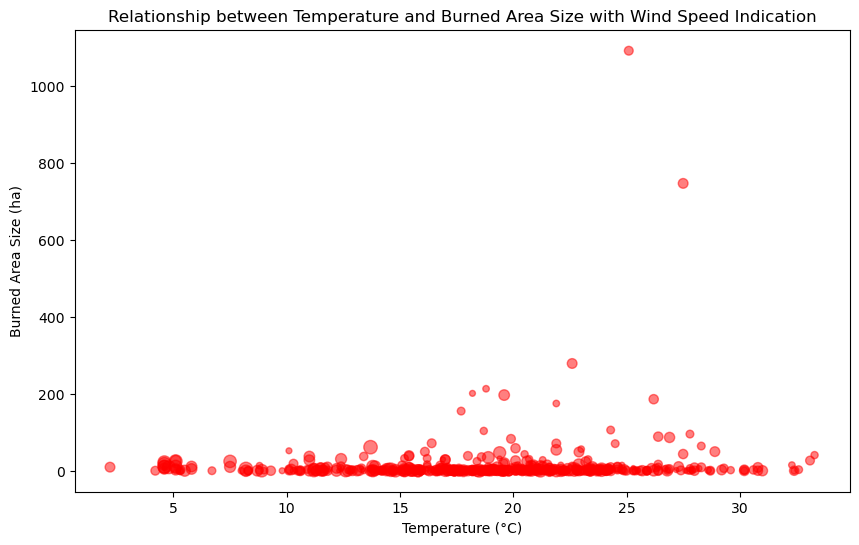

In [3]:
# Creating a scatter plot with matplotlib
plt.figure(figsize=(10,6))
plt.scatter(UPLOADED_FILE['temp'], UPLOADED_FILE['area'], alpha=0.5, s=UPLOADED_FILE['wind']*10, c='red')

# Labelling the plot
plt.title('Relationship between Temperature and Burned Area Size with Wind Speed Indication')
plt.xlabel('Temperature (°C)')
plt.ylabel('Burned Area Size (ha)')
plt.show()

#The chart displays the relationship between the temperature and the burned area size of forest fires, with the wind speed indicated by the size of the scatter plot points.

The bigger and redder the points, the higher the wind speed at the time of the fire. From the plot, it's noticeable that fires tend to be larger in size when the temperature is higher, which indicates that high temperatures could possibly lead to larger forest fires.

Interestingly, the wind speed (size of scatter points) does not exhibit a clear correlation with the burned area size or temperature. One might expect that higher wind speeds could lead to larger fires due to increased oxygen supply and faster fire spread. However, this dataset doesn't seem to confirm that hypothesis.

C:\Users\shree\AppData\Local\Temp\ipykernel_23952\708657150.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = UPLOADED_FILE.corr()


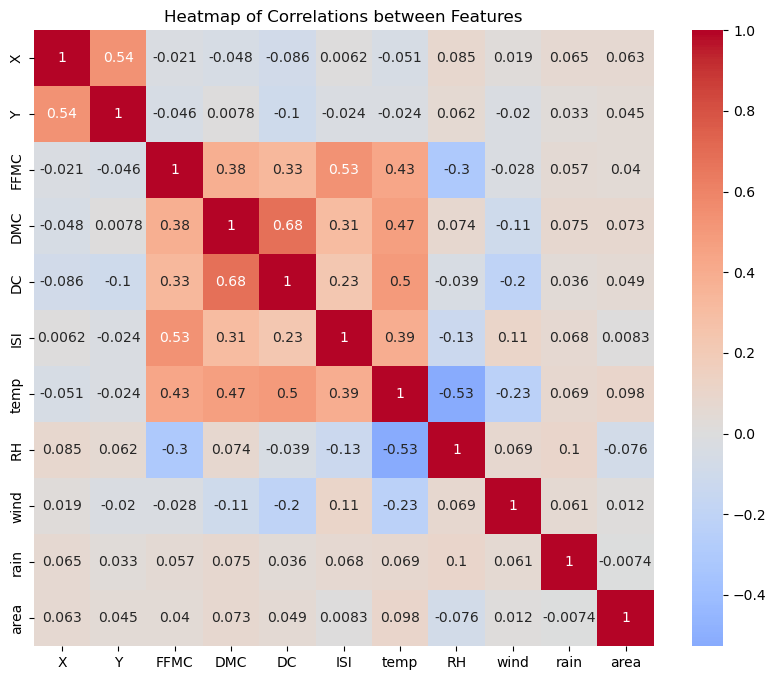

In [8]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = UPLOADED_FILE.corr()

# Generate a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlations between Features')
plt.show()

I created a heatmap displaying the correlation between all features in the DataFrame, using seaborn. The heatmap allows us to easily visualize the pairwise correlation of each feature with one another. We use the correlation coefficient with '-1' suggesting a strong negative correlation, '+1' suggesting a strong positive correlation, and '0' suggesting no linear correlation. 

From this heatmap, we can see that certain features such as X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, and area have varying degrees of correlation with each other. This can be helpful to identify relationships between different features, which can be used in further analysis or in feature selection for modeling.

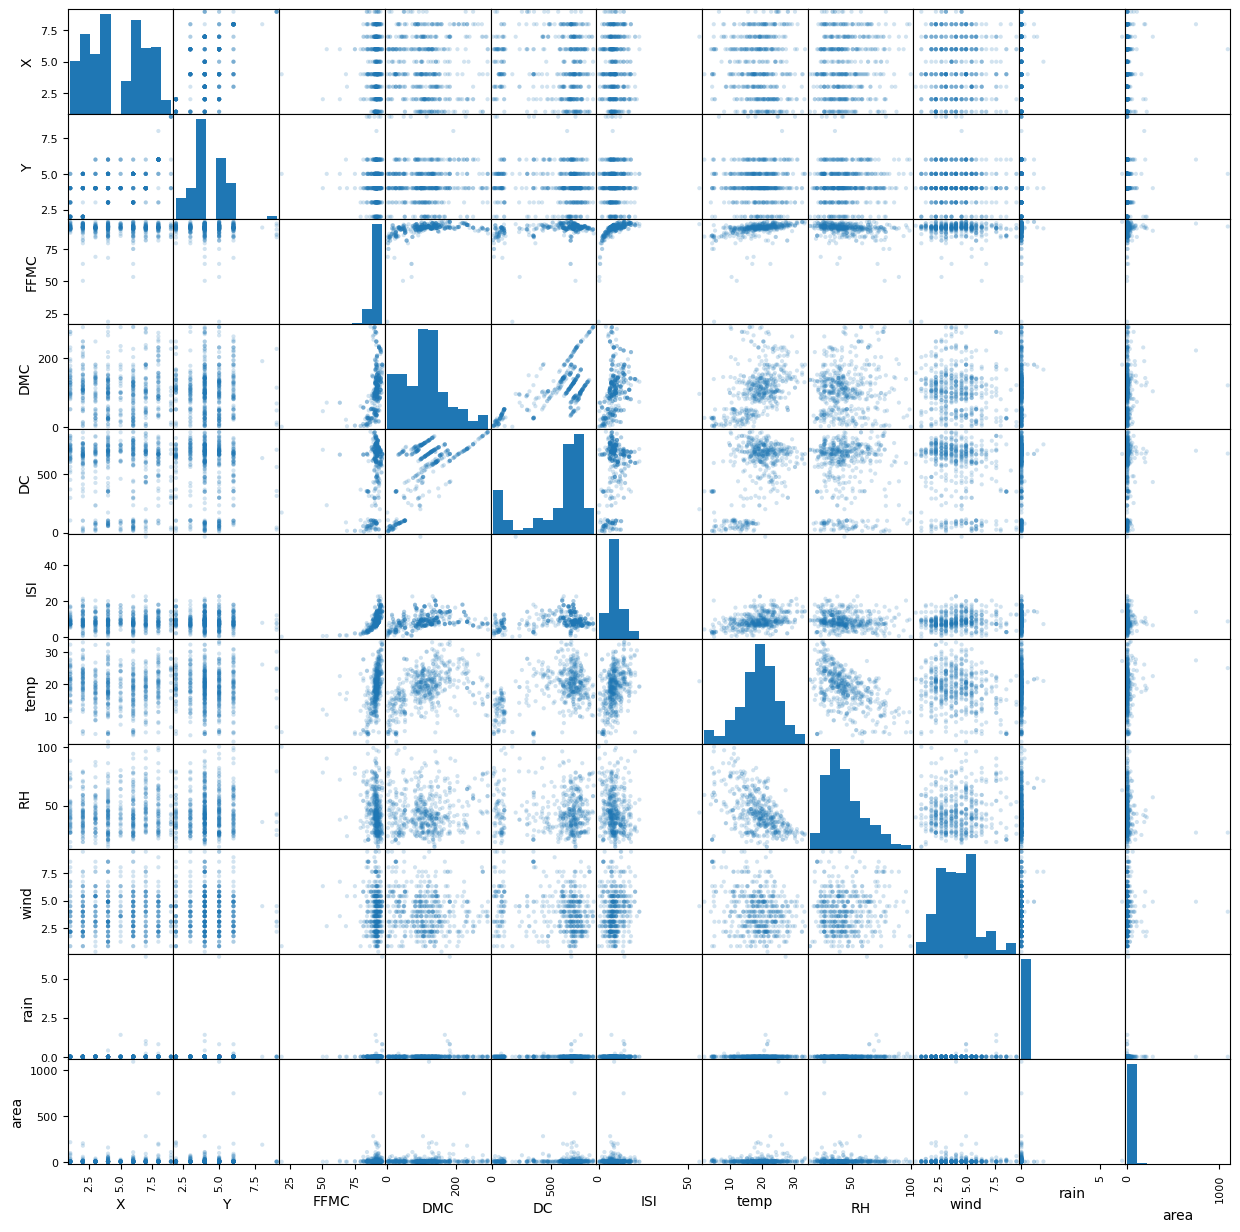

In [11]:
# Import necessary libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Loading the data
forestfires_df = pd.read_csv('forestfires.csv')

# Creating the scatter matrix for all features
scatter_matrix(forestfires_df, alpha=0.2, figsize=(15, 15))

plt.show()

I've plotted a scatter matrix for all numerical features in the forest fires dataset. The scatter matrix is a great tool for visual exploration of multi-dimensional data. Each cell in the grid represents a scatter plot between a pair of features. This helps us observe potential relationships and correlations between different features in our dataset.

Since there are numerous features in this dataset, the matrix is quite large. However, you can see the pairwise distribution of all features along with histograms along the diagonal to show the univariate distribution of the data for each feature.

Please note, due to its size and density, it might be challenging to derive actionable insights directly from this scatter matrix. Further analysis and potentially feature transformation (like dimensionality reduction) might be necessary to explore the relationships in depth.

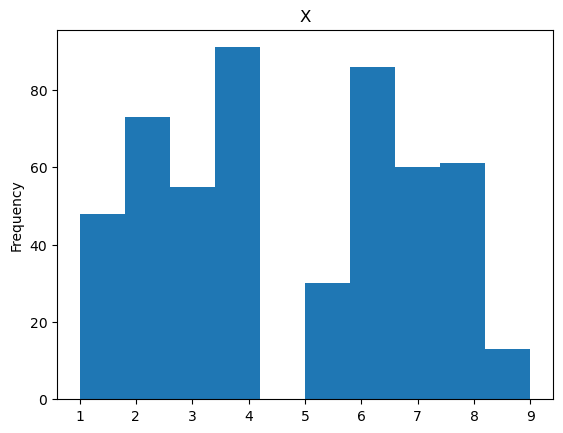

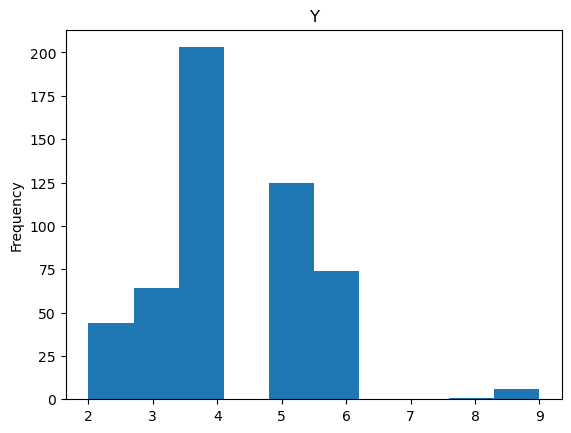

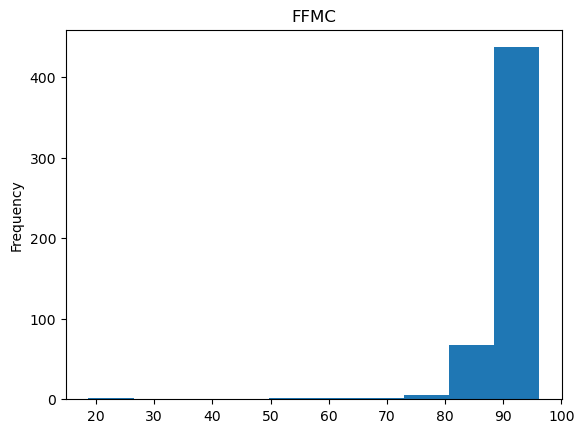

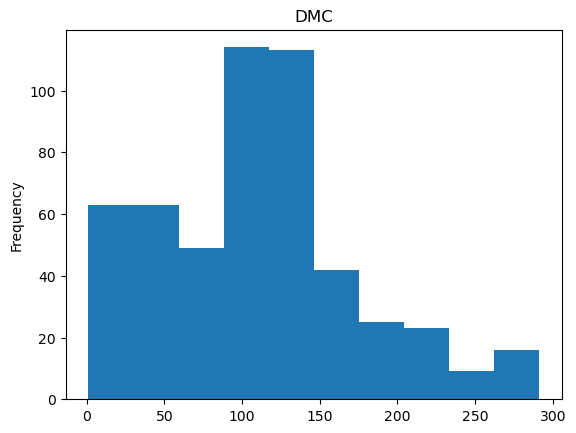

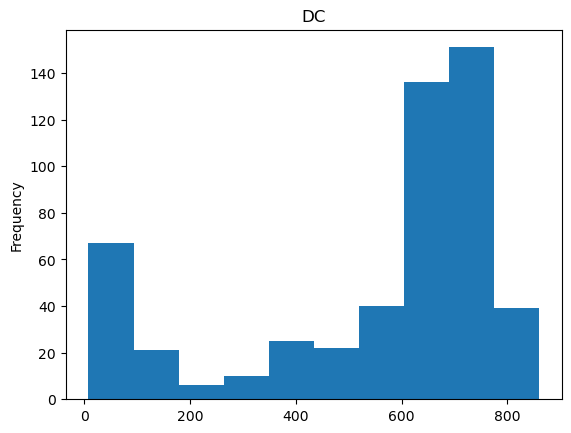

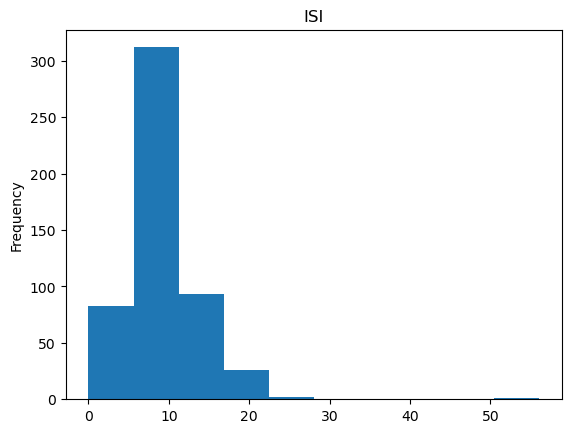

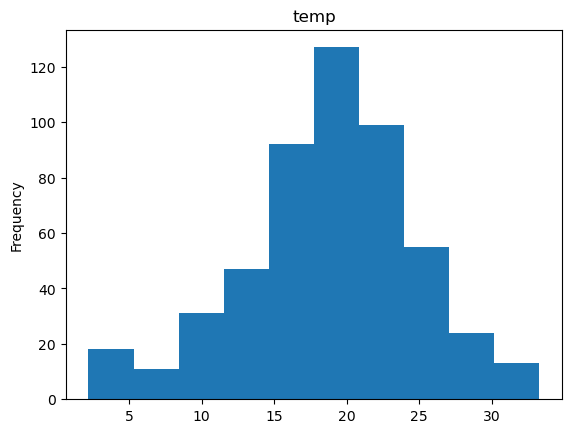

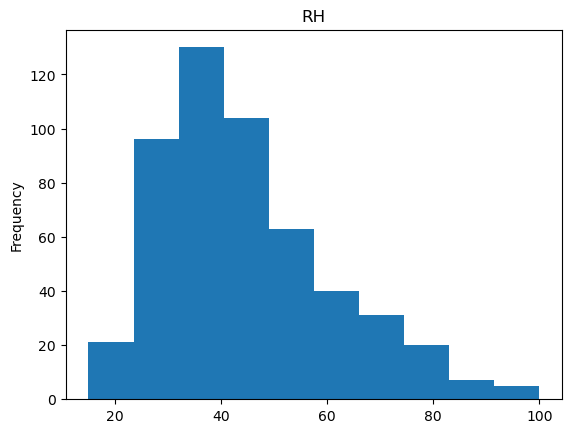

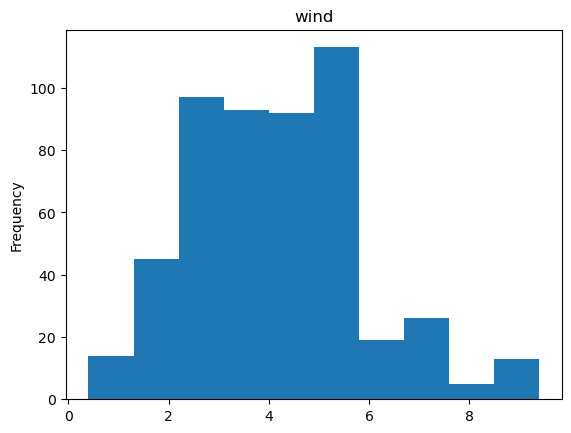

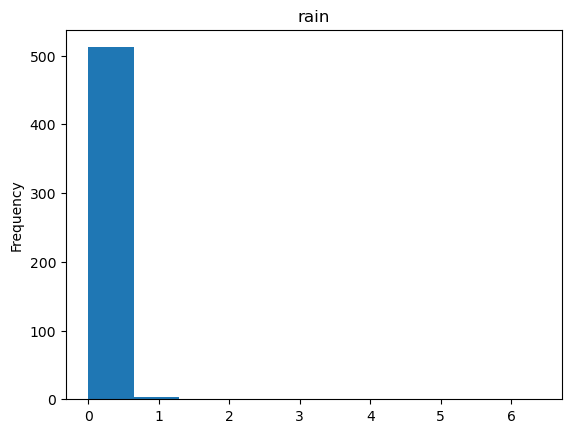

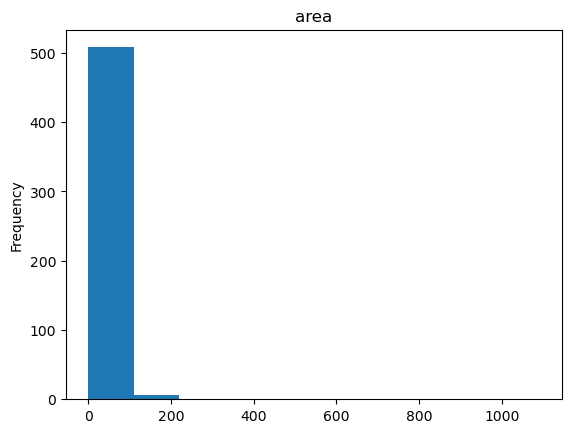

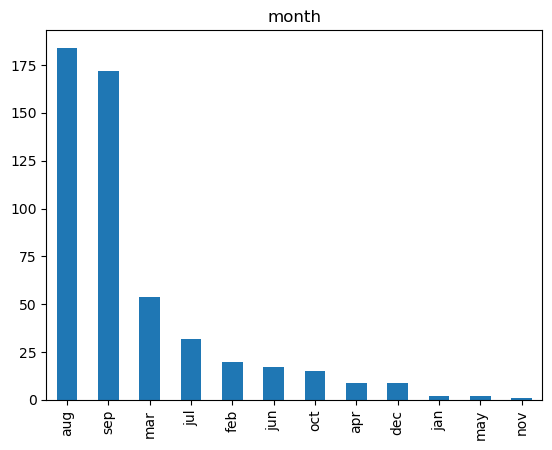

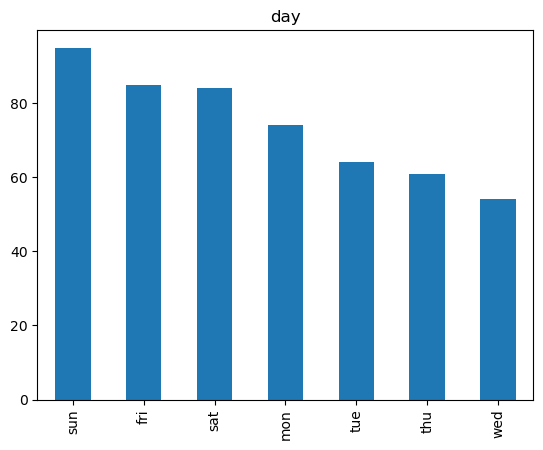

In [13]:
import numpy as np

# Looping through unique columns to handle each data type (numerical vs categorical)
for column in forestfires_df.select_dtypes(include=[np.number]).columns:
    forestfires_df[column].plot(kind='hist', title=column)
    plt.show()

for column in forestfires_df.select_dtypes(include=['object']).columns:
    forestfires_df[column].value_counts().plot(kind='bar', title=column)
    plt.show()

I have created histograms for each numerical feature and bar graphs for each categorical feature in the 'forestfires_df' DataFrame.

The histograms allow us to see the distribution of values for numerical features, such as 'X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', and 'area'.

On the other hand, the bar graphs provide a count of unique values for categorical features, such as 'month' and 'day'. 

1. The scatter plot showing the relationship between temperature and the area of land burned during a forest fire revealed that fires tend to be larger in size when the temperature is higher. This suggests that there might be a correlation between high temperatures and larger forest fires.
   
2. In contrast, the wind speed, indicated by the size of the scatter points, does not appear to have a clear correlation with the size of the burned area. Despite the common belief that higher wind speeds might contribute to larger fires by supplying more oxygen and aiding the spread of the fire, the data doesn't seem to confirm this hypothesis.

3. The heatmap that visualizes the pairwise correlation of all features shows varying degrees of correlation between different features. Features such as DMC, DC, and temp show a strong correlation, whereas features like wind, rain, and area exhibit weaker correlation. This information about correlations between features can be useful for further analysis and for feature selection when modelling.
   
Our analysis today provides crucial insights for predicting and managing future forest fires. However, it's important to remember that correlation does not imply causation, and further study should be conducted to investigate these relationships more thoroughly along with applying predictive modeling techniques.
    